This is an exercise from the YouTube Video [angGraph Complete Course for Beginners – Second exercise](https://youtu.be/jGg_1h0qzaM?t=2636)

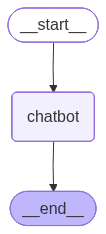

{'name': 'Alice',
 'values': [1, 2, 3, 4],
 'operation': '+',
 'result': 'hi Alice, your answer is: 10'}

In [ ]:
import math
from typing import TypedDict

from IPython.display import Image, display
from langgraph.graph import StateGraph


# Define the state schema
class State(TypedDict):
    name: str
    values: list[int]
    operation: str
    result: str


def process(state: State) -> State:
    name = state["name"]
    values = state["values"]
    operation = state["operation"]

    if operation == "+":
        calculated_value = sum(values)
    elif operation == "*":
        calculated_value = math.prod(values)
    else:
        calculated_value = 0

    state["result"] = f"hi {name}, your answer is: {calculated_value}"
    return state


# Build the graph
graph = StateGraph(State)
graph.add_node("process", process)
graph.set_entry_point("process")
graph.set_finish_point("process")

# Compile the graph
agent = graph.compile()
display(Image(agent.get_graph().draw_mermaid_png()))

agent.invoke({"name": "Alice", "values": [1, 2, 3, 4], "operation": "+"})